In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-pred-traincsv/Loan pred_train.csv
/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv


In [135]:
train_df = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan pred_train.csv") 
test_df = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv")

In [136]:
# Loan amount in thousands
train_df['LoanAmount'] = train_df['LoanAmount'] * 1000
test_df['LoanAmount'] = test_df['LoanAmount'] * 1000

In [137]:
# Loan_Amount_Term: Term of loan in months

In [138]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [139]:
train_df.shape

(614, 13)

In [140]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146412.162162,85587.325236,9000.0,100000.0,128000.0,168000.00,700000.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [141]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,136132.596685,61366.652393,28000.0,100250.0,125000.0,158000.0,550000.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.0,1.0,1.0,1.0


In [142]:
test_df.shape

(367, 12)

## missing column in Train_df

In [143]:
cols_with_missing = [col for col in train_df.columns 
                                 if train_df[col].isnull().any()]
cols_with_missing

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [144]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### % of missing values

In [145]:
for col in train_df.columns:
    percent = train_df[col].isna().sum() / len(train_df)
    print('{} \t {}'.format(col,round(percent*100)))

Loan_ID 	 0.0
Gender 	 2.0
Married 	 0.0
Dependents 	 2.0
Education 	 0.0
Self_Employed 	 5.0
ApplicantIncome 	 0.0
CoapplicantIncome 	 0.0
LoanAmount 	 4.0
Loan_Amount_Term 	 2.0
Credit_History 	 8.0
Property_Area 	 0.0
Loan_Status 	 0.0


##### Dropping is only advised to be used if missing values are few (say 0.01–0.5% of our data)



In [146]:
# train_df.dropna(inplace=True)   # give resulting shape (480,13)

# so we are lossing 614-480 = 134 rows if we blindly drop all rows with missing values

## check for duplicated data

In [147]:
train_df.duplicated().sum()

0

## missing column in Test_df

In [148]:
cols_with_missing = [col for col in test_df.columns 
                                 if test_df[col].isnull().any()]
cols_with_missing

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Seeing Skweness and Kutorsis

In [149]:
train_df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [150]:
train_df.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

Skewness and Kurtosis show if the data is normally disctributed or not. 

##### Mean Median Mode

- If the skewness is equal to zero, the data is normally distributed, meaning it's symmetric. i.e Mean = Median = Mode 

- Negative values for the skewness indicate data that it's skewed left and it's left 'tail' is longer compare to the right one. i.e Mean < Median < Mode,  And vice versa. 

If the data are multi-modal, then this may affect the sign of the skewness.

Many classical statistical tests and intervals depend on normality assumptions. Significant skewness and kurtosis indicate that data is not normal and it needs to be normalized.

In [151]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [152]:
train_df['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

## Filling missing values of categorical columns

In [153]:
train_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
train_df['Married'].fillna((train_df['Married'].mode()[0]),inplace=True)
train_df['Dependents'].fillna((train_df['Dependents'].mode()[0]),inplace=True)
train_df['Education'].fillna((train_df['Education'].mode()[0]),inplace=True)###############
train_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
train_df['Self_Employed'].fillna((train_df['Self_Employed'].mode()[0]),inplace=True)


test_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
test_df['Married'].fillna((train_df['Married'].mode()[0]),inplace=True)
test_df['Dependents'].fillna((train_df['Dependents'].mode()[0]),inplace=True)
test_df['Education'].fillna((train_df['Education'].mode()[0]),inplace=True)################
test_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
test_df['Self_Employed'].fillna((train_df['Self_Employed'].mode()[0]),inplace=True)


In [154]:
# replacing '+' from Dependent column
train_df['Dependents']=train_df['Dependents'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
# train_df['Dependents']=train_df['Dependents'].apply(lambda x:int(x))

test_df['Dependents']=test_df['Dependents'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
# test_df['Dependents']=test_df['Dependents'].apply(lambda x:int(x))

In [155]:
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Filling NaN's in Float/Int columns

In [156]:
print(train_df['LoanAmount'].median())
print(train_df['LoanAmount'].mode())
print(train_df['LoanAmount'].mean())
print(" ")
print(train_df['Loan_Amount_Term'].median())
print(train_df['Loan_Amount_Term'].mode())
print(train_df['Loan_Amount_Term'].mean())
print(" ")
print(train_df['Credit_History'].median())
print(train_df['Credit_History'].mode())
print(train_df['Credit_History'].mean())

128000.0
0    120000.0
dtype: float64
146412.16216216216
 
360.0
0    360.0
dtype: float64
342.0
 
1.0
0    1.0
dtype: float64
0.8421985815602837


In [157]:
train_df['LoanAmount'].fillna((train_df['LoanAmount'].median()),inplace=True)
train_df['Loan_Amount_Term'].fillna((train_df['Loan_Amount_Term'].median()),inplace=True)
# train_df['Credit_History'].fillna((train_df['Credit_History'].median()),inplace=True)

test_df['LoanAmount'].fillna((test_df['LoanAmount'].median()),inplace=True)
test_df['Loan_Amount_Term'].fillna((test_df['Loan_Amount_Term'].median()),inplace=True)
# test_df['Credit_History'].fillna((test_df['Credit_History'].median()),inplace=True)

In [158]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df['Loan_Status'] = encoder.fit_transform(train_df['Loan_Status'])

In [159]:
#filling credit_history where loan status was approved
train_df['Credit_History'] = np.where(((train_df['Credit_History'].isnull()) & (train_df['Loan_Status'] ==1)),
                                   1,train_df['Credit_History'])

#filling credit_history based on where loan status was declined
train_df['Credit_History'] = np.where(((train_df['Credit_History'].isnull()) & (train_df['Loan_Status'] ==0)),
                                   0,train_df['Credit_History'])

In [160]:
#filling credit_history where loan status was approved
# test_df['Credit_History'] = np.where(((test_df['Credit_History'].isnull()) & (train_df['Loan_Status'] ==1)),
#                                    1,test_df['Credit_History'])

#filling credit_history based on where loan status was declined
# test_df['Credit_History'] = np.where(((test_df['Credit_History'].isnull()) & (test_df['Loan_Status'] ==0)),
#                                    0,test_df['Credit_History'])

In [161]:
train_df['Credit_History'].value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [162]:
train_df.drop("Loan_ID",axis=1,inplace=True)
test_df.drop("Loan_ID",axis=1,inplace=True)

In [163]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [164]:
test_df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

# Creating Features

In [165]:
#Log transfromations
train_df['LoanAmount'] = np.log1p(train_df['LoanAmount'])

#Log transforming features
train_df['ApplicantIncome'] = np.log1p(train_df['ApplicantIncome'])
train_df['CoapplicantIncome'] = np.log1p(train_df['CoapplicantIncome'])

#coapplicant income and applicant income both serves as determinants for loan status
#log transformation

train_df['total_income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df['total_income'] = np.log1p(train_df['total_income'])

#Log transformation 
train_df['Ratio of LoanAmt :Total_Income'] = train_df['LoanAmount'] / train_df['total_income']
train_df['Ratio of LoanAmt :Total_Income'] = np.log1p(train_df['Ratio of LoanAmt :Total_Income'])

In [166]:
#Log transfromations
test_df['LoanAmount'] = np.log1p(test_df['LoanAmount'])

#Log transforming features
test_df['ApplicantIncome'] = np.log1p(test_df['ApplicantIncome'])
test_df['CoapplicantIncome'] = np.log1p(test_df['CoapplicantIncome'])

#coapplicant income and applicant income both serves as determinants for loan status
#log transformation

test_df['total_income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['total_income'] = np.log1p(test_df['total_income'])

#Log transformation 
test_df['Ratio of LoanAmt :Total_Income'] = test_df['LoanAmount'] / test_df['total_income']
test_df['Ratio of LoanAmt :Total_Income'] = np.log1p(test_df['Ratio of LoanAmt :Total_Income'])

# Categorical Variables and Dummy Variables

Machine learning algorithims cannot take in words/categorical variables. Therefore, they need to be encoded(represented) in the form of numbers before the models can handle them. A process called One-Hot encoding is used and this creates categorical variables into 0's and 1's giving a unique representation of each as and when they occur in the dataset.


A Pandas function called 'pd.get_dummies' is used in this scenario to one hot encode (represent) these categorical variables.



In [167]:
#checking the categorical variables in the dataset
train_df.select_dtypes(['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [169]:
#One hot encoding variables
Dummies = pd.get_dummies(train_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']],drop_first=True)

#Dropping the columns which got one hot-encoded
train_df = train_df.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1)

#Combining the one-hot encoded variables into the actual dataset to make it as one
train_df = pd.concat([train_df,Dummies],axis=1)

In [170]:
#One hot encoding variables
Dummies = pd.get_dummies(test_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']],drop_first=True)

#Dropping the columns which got one hot-encoded
test_df = test_df.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1)

#Combining the one-hot encoded variables into the actual dataset to make it as one
test_df = pd.concat([test_df,Dummies],axis=1)

In [171]:
train_df.dtypes

ApplicantIncome                   float64
CoapplicantIncome                 float64
LoanAmount                        float64
Loan_Amount_Term                  float64
Credit_History                    float64
Loan_Status                         int64
total_income                      float64
Ratio of LoanAmt :Total_Income    float64
Gender_Male                         uint8
Married_Yes                         uint8
Dependents_1                        uint8
Dependents_2                        uint8
Dependents_3                        uint8
Education_Not Graduate              uint8
Self_Employed_Yes                   uint8
Property_Area_Semiurban             uint8
Property_Area_Urban                 uint8
dtype: object

## now let's convert object to Int/Float, using label enoders

In [134]:


# cat_list = ['Gender','Married','Education','Self_Employed','Property_Area']

# for i in cat_list:
#     le = LabelEncoder()
#     train_df[i] = train_df[i].astype('str')
#     train_df[i] = le.fit_transform(train_df[i])
#     test_df[i] = test_df[i].astype('str')
#     test_df[i] = le.fit_transform(test_df[i])
    
# le = LabelEncoder()
# train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status'])

# train_test_split

In [172]:
X = train_df.drop("Loan_Status",axis=1)
y =  train_df.Loan_Status

In [173]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.1, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((552, 16), (62, 16), (552,), (62,))

## Normalization

In [174]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
# X_train_scaled.skew()

In [176]:
# X_train_pca.kurt()

# PCA

In [177]:
from sklearn.decomposition import PCA

Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables. Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has maximum variance.

In [178]:
# score with all 6 the features
pca = PCA()
temp_X_train= X_train
temp_X_train = pca.fit_transform(temp_X_train)
pca.explained_variance_ratio_

array([1.96885272e-01, 1.83186278e-01, 9.89835530e-02, 9.01492443e-02,
       8.46575283e-02, 7.01760478e-02, 6.37166722e-02, 6.02832200e-02,
       5.16703135e-02, 4.79291317e-02, 2.95744449e-02, 1.02780548e-02,
       8.92049192e-03, 3.48448916e-03, 1.02033682e-04, 3.22541286e-06])

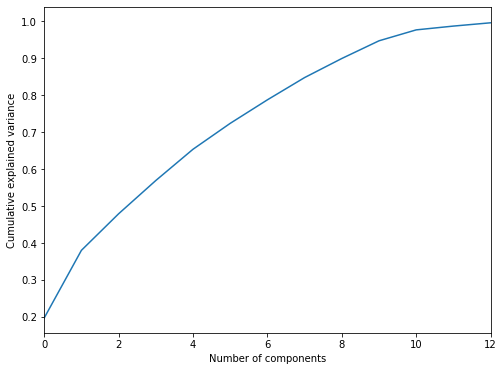

In [179]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter = 100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy : {}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy : 0.8387096774193549


In [181]:
X_train.shape

(552, 16)

## PCA with n_components

In [182]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### checking

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter = 100)
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)

print('Logistic Regression accuracy : {}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy : 0.8387096774193549


## Thus going with all the features

In [82]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=2,
                        min_child_weight=4, 
                         seed=27)

clf.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('XGboost accuracy score {}'. format(accuracy_score(y_test, y_pred)))

XGboost accuracy score 0.8387096774193549


In [83]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05, n_estimators=200, max_depth=3)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('catboost accuracy score{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0:	learn: 0.6649997	total: 59.2ms	remaining: 11.8s
1:	learn: 0.6403827	total: 61.6ms	remaining: 6.1s
2:	learn: 0.6180196	total: 63.3ms	remaining: 4.15s
3:	learn: 0.5979945	total: 64.8ms	remaining: 3.18s
4:	learn: 0.5807328	total: 66.3ms	remaining: 2.58s
5:	learn: 0.5658057	total: 67.7ms	remaining: 2.19s
6:	learn: 0.5519782	total: 69.6ms	remaining: 1.92s
7:	learn: 0.5395042	total: 70.9ms	remaining: 1.7s
8:	learn: 0.5283931	total: 72.3ms	remaining: 1.53s
9:	learn: 0.5191157	total: 73.8ms	remaining: 1.4s
10:	learn: 0.5106366	total: 75.1ms	remaining: 1.29s
11:	learn: 0.5030440	total: 76.1ms	remaining: 1.19s
12:	learn: 0.4959150	total: 77.1ms	remaining: 1.11s
13:	learn: 0.4893424	total: 78.1ms	remaining: 1.04s
14:	learn: 0.4837822	total: 79.3ms	remaining: 978ms
15:	learn: 0.4778377	total: 80.7ms	remaining: 928ms
16:	learn: 0.4734820	total: 81.7ms	remaining: 880ms
17:	learn: 0.4685697	total: 82.8ms	remaining: 838ms
18:	learn: 0.4660856	total: 83.6ms	remaining: 797ms
19:	learn: 0.4624525	tota

In [84]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier(boosting_type='gbdt',
    num_leaves=20,
    max_depth=2,
    learning_rate=0.005,
    n_estimators=150,
#     subsample=0.9,
                   )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('LGBMClassifier accuracy: {}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier accuracy: 0.8387096774193549


0.8297101449275363

## Submission

### 99% for training

In [ ]:
X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### choosing the best model

In [ ]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=2,
                        min_child_weight=4, 
                         seed=27)

clf.fit(X_train, y_train)

# # y_pred = logreg.predict(X_test)
# y_pred = clf.predict(X_test)
# print('XGboost accuracy score {}'. format(accuracy_score(y_test, y_pred)))

### Results

In [ ]:
result = clf.predict(test_df)

In [ ]:
test_id = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv")
test_id = test_id.Loan_ID

In [ ]:
result = pd.DataFrame(result)
test_id = pd.DataFrame(test_id)

In [ ]:
submission = pd.merge(test_id,result,left_index=True,right_index=True)

In [ ]:
submission.head(1)

In [ ]:
submission.rename(columns={0:'Loan_Status'},inplace=True)

In [ ]:
submission.head(1)

In [ ]:
submission.to_csv('Loan.csv',index=False)

In [ ]:
submission['Loan_Status'].value_counts()